In [8]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.transform import resize
from tqdm import tqdm
import random
import tensorflow as tf
import cv2 #<- for interfacing camera and simulating functions
from IPython.display import display, clear_output
import json
import os
import sys

from ConnectedComponentLabelling import ConnectedComponents

# Used to 
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\main")

from grayscaleconversionlatest import BinarizeImage

from imageprocessingLibraries import *



(2688, 1906)


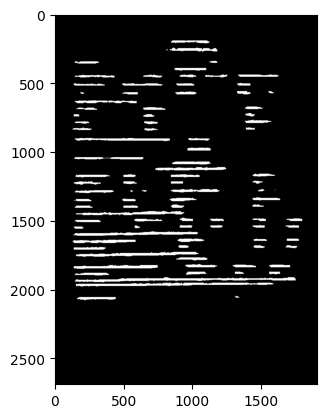

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [9]:
# imagePath = "..\\TestImages\\Screenshot 2023-09-05 122022.png"
# imagePath = "..\\TestImages\\englishInsuranceform_lowRes.jpg"
imagePath = "..\\main\\predMaskImage.jpg"


testImage = imread(imagePath)
print(testImage.shape)
# testImage = testImage/255
# testImage = resize(testImage, (30, 110), mode='constant', preserve_range = True)

testImage = testImage > 0
testImage = testImage.astype(int)



# testImage = ConvertToGrayScale(testImage)
# testImage = BinarizeImage(testImage, 0)
# testImage = testImage.astype(int)


# # np.save('.\\BinarizeImage.npy', testImage)
# testImage = np.load('.\\BinarizeImage.npy')

BinPILImshow(testImage, 0)
BinImshow(testImage, 0)

start = 500
end = start + 24
print(testImage[start:end, start:end])

Connected Components V4: 

In [10]:
# Own DFS
import sys

# def ConnectedComponents(testImage):
#     sys.setrecursionlimit(320000)
#     testImage = np.array(testImage)

#     def dfs(i, j, label):
#         if 0 <= i < len(testImage) and 0 <= j < len(testImage[0]) and testImage[i][j] == True:
#              testImage[i][j] = label

#              dfs(i, j-1, label) # left
#              dfs(i, j+1, label) # right
#              dfs(i-1, j, label) # top
#              dfs(i+1, j, label) # bottom
#              dfs(i-1, j-1, label) # NW
#              dfs(i-1, j+1, label) # NE
#              dfs(i+1, j-1, label) # SW
#              dfs(i+1, j+1, label) # SE

#     label = 2
#     for i in range(len(testImage)):
#         for j in range(len(testImage[0])):
#             if testImage[i][j] == True:
#                 dfs(i, j, label)
#                 label += 1


#     testImage = testImage - 1
#     testImage[testImage == -1] = 0
#     totalNumOfLabels = np.max(testImage) + 1


#     return totalNumOfLabels, testImage


binary_image = [
    [0, 0, 1, 0, 1],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0],
    [1, 1, 0, 0, 1],
    [0, 0, 0, 1, 1]
]

totalLabels, labels = ConnectedComponents(testImage)

print("totalLabels", totalLabels)

colors = np.random.randint(0, 255, size =(totalLabels, 3), dtype=np.uint8)
colors[0] =[0,0,0]

colored_components = colors[labels]

PILImshow(colored_components)



print(labels[start:end, start:end])

totalLabels 98
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14 14 14 14 14 14 14 14 14 14 14 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [14 14 14 14 14 14 14 14 14 14 14 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [14 14 14 14 14 14 14 14 14 14 14 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14]
 [14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14]
 [14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14]
 [14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14]
 [14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14]
 [14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14]
 [14 14 14

Compare OpenCV's version:

In [11]:
import cv2 #<- for interfacing camera and simulating functions

binary_image = np.array([
    [0, 0, 1, 0, 1],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0],
    [1, 1, 0, 0, 1],
    [0, 0, 0, 1, 1]
])

totalLabels, labels, stats, centroids = cv2.connectedComponentsWithStats(testImage.astype(np.uint8), 8)

print("totalLabels", totalLabels)

colors = np.random.randint(0, 255, size =(totalLabels, 3), dtype=np.uint8)
colors[0] =[0,0,0]

colored_components = colors[labels]

PILImshow(colored_components)


print(labels[start:end, start:end])


totalLabels 98
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [14 14 14 14 14 14 14 14 14 14 14 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [14 14 14 14 14 14 14 14 14 14 14 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [14 14 14 14 14 14 14 14 14 14 14 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14]
 [14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14]
 [14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14]
 [14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14]
 [14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14]
 [14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14]
 [14 14 14

In [12]:



# testImageOriginal = testImage
# testImage = testImage * 255
# originalHeight = testImage.shape[0]
# originalWidth = testImage.shape[1]

# print(originalHeight, originalWidth)

# # imshow(testImage, cmap='gray')
# # BinPILImshow(testImage, 0)

print(type(testImage[0][0]))

np.set_printoptions(threshold = np.inf)

# print(np.where(testImage==1))
# print(testImage)



<class 'numpy.int32'>


In [13]:
# 1D array 
arr = np.array([[np.nan, 2, np.nan], [np.nan, 3, np.nan]])
print("arr : ", arr) 
print("Min of arr : ", np.amin(arr))
  
# nanmin ignores NaN values. 
print("nanMin of arr : ", np.nanmin(arr, axis=1))

arr :  [[nan  2. nan]
 [nan  3. nan]]
Min of arr :  nan
nanMin of arr :  [2. 3.]


Connected Components V1:

In [14]:


def ConnectedComponents(testImage):

    windowSize = 3
    mid = windowSize//2
    grayScaleArrayPadded = np.pad(testImage, mid, 'constant', constant_values=(0))
    nRows = np.shape(grayScaleArrayPadded)[0]
    nColumns = np.shape(grayScaleArrayPadded)[1]
    labelMap = np.zeros((nRows, nColumns))

    labelCounter = 1

    equivalancyDict = dict()


    # -------------------------- First Pass --------------------------  

    for i in range(mid, nRows-mid):
        for j in range(mid, nColumns-mid):

            if grayScaleArrayPadded[i][j] == 1:

                neighbours = np.array([labelMap[i,j-1],
                                    labelMap[i-1,j-1],
                                    labelMap[i-1,j],
                                    labelMap[i-1,j+1]
                                    # grayScaleArrayPadded[i,j+1],
                                    # grayScaleArrayPadded[i+1,j-1]
                                    ]) 


                # If all neighbours are zero: assign a new component label
                if  np.count_nonzero(neighbours) == 0:
                    labelMap[i][j] = labelCounter
                    labelCounter += 1

                # If one non-zero neighbour is present: give it the same label as that one
                elif np.count_nonzero(neighbours) == 1:
                    label = neighbours[np.where(neighbours != 0)]
                    labelMap[i][j] = label

                # If multiple non zero neighbours are present:
                if np.count_nonzero(neighbours) > 1:
                    # find labels of non-zero neighbours:
                    labels = neighbours[np.where(neighbours != 0)]
                    minLabel = labels.min()
                    labelMap[i][j] = minLabel

                    for label in labels:
                        if label != minLabel:
                            if minLabel in equivalancyDict.keys():
                                equivalancyDict[minLabel] = np.unique(np.append(equivalancyDict[minLabel], label)) 
                            else:
                                equivalancyDict[minLabel] = np.array([label])

    # print("equivalancyDict", equivalancyDict)

    # -------------------------- Restructure Hashmap --------------------------  
    # Fix equivalences in hashmap so that all equivalences are condensed without duplicate equivalnces.
    # e.g 17->18 and 18->34-35 gets condensed to 17->34-35

    for key in list(equivalancyDict):
        if key in equivalancyDict.keys():
            array = equivalancyDict[key] 

            counter = 0
            arrayLength = len(array)

            while counter < arrayLength:

                # print("counter", counter, "arrayLength", arrayLength)

                val = array[counter]

                if val in equivalancyDict.keys():
                    subArray = equivalancyDict[val]

                    array = np.unique(np.append(array, subArray)) 

                    equivalancyDict[key] = array


                    # reset while loop counter:
                    counter = 0
                    arrayLength = len(array)


                    #delete subArray entry:
                    del equivalancyDict[val]

                else:
                    counter = counter + 1
                    

    # print("equivalancyDict", equivalancyDict)

    # Inverse mapping to make relabelling easier:

    newEquivalancyDict = dict()

    for key in equivalancyDict.keys():
        subArray = equivalancyDict[key]
        for val in subArray:
            newEquivalancyDict[val] = key

    print("newEquivalancyDict", newEquivalancyDict)


    # Remove padding from image:
    labelMap = labelMap[mid: nRows-mid, mid: nColumns - mid] 

         
    # ----------------------------Second Pass ------------------------------------
    # Relabel equivalent labels:

    def replace(value):
        return newEquivalancyDict.get(value, value)
    

    # Vectorize the above function: - https://www.geeksforgeeks.org/python-ways-to-remove-a-key-from-dictionary/
    vReplace = np.vectorize(replace)

    labelMap = vReplace(labelMap)


    uniqueLabels = np.unique(labelMap)
    print("uniqueLabels", uniqueLabels)

    def getIndexes(value):
        return np.where(uniqueLabels == value)[0]
    
    vGetIndexes = np.vectorize(getIndexes)

    # Replace labels from 0,1,2,3,5,7,8,9 -> 0,1,2,3,4,5,6,7
    labelMap = vGetIndexes(labelMap)


    totalNumOfLabels = len(uniqueLabels)
    # totalNumOfLabels = max(uniqueLabels) + 1

    return totalNumOfLabels, labelMap


totalLabels, labels = ConnectedComponents(testImage)

print("totalLabels", totalLabels)

colors = np.random.randint(0, 255, size =(totalLabels, 3), dtype=np.uint8)
colors[0] =[0,0,0]

colored_components = colors[labels]

PILImshow(colored_components, colored_components)

KeyboardInterrupt: 

Connected Components V2:

In [ ]:

def ConnectedComponents(testImage):

    windowSize = 3
    mid = windowSize//2
    grayScaleArrayPadded = np.pad(testImage, mid, 'constant', constant_values=(0))
    nRows = np.shape(grayScaleArrayPadded)[0]
    nColumns = np.shape(grayScaleArrayPadded)[1]

    labelCounter = 1

    equivalancyDict = dict({})

    count = 0


    # -------------------------- First Pass --------------------------  

    for i in range(mid, nRows-mid):
        for j in range(mid, nColumns-mid):

            if grayScaleArrayPadded[i][j] == 1:

                neighbours = np.array([grayScaleArrayPadded[i,j-1],
                                    grayScaleArrayPadded[i-1,j-1],
                                    grayScaleArrayPadded[i-1,j],
                                    grayScaleArrayPadded[i-1,j+1]]) 


                # If all neighbours are zero: assign a new component label
                if  np.count_nonzero(neighbours) == 0:
                    grayScaleArrayPadded[i][j] = labelCounter
                    labelCounter += 1

                # If one non-zero neighbour is present: give it the same label as that one
                elif np.count_nonzero(neighbours) == 1:
                    label = neighbours[np.where(neighbours != 0)]
                    grayScaleArrayPadded[i][j] = label

                # If multiple non zero neighbours are present:
                else:
                    # find labels of non-zero neighbours:
                    labels = neighbours[np.where(neighbours != 0)]
                    minLabel = labels.min()
                    grayScaleArrayPadded[i][j] = minLabel

                    # add each non minLabel label to the equivalency list:
                    for label in labels:
                        
                        if label not in equivalancyDict.keys() and label != minLabel:
                            equivalancyDict[label] = minLabel
                        elif label in equivalancyDict.keys() and label != minLabel:
                            if equivalancyDict[label] > minLabel:
                                l = equivalancyDict[label]
                                equivalancyDict[label] = minLabel
                                while l in equivalancyDict.keys() and count < 20000:
                                    count = count + 1
                                    l = equivalancyDict[l]
                                    equivalancyDict[l] = minLabel
                                equivalancyDict[l] = minLabel
                 


    print("equivalancyDict", equivalancyDict)

    


    # Remove padding from image:
    grayScaleArrayPadded = grayScaleArrayPadded[mid: nRows-mid, mid: nColumns - mid] 

         



    # ----------------------------Second Pass ------------------------------------
    # Relabel equivalent labels:

    def replace(value):
        return equivalancyDict.get(value, value)
    

    # Vectorize the above function: - https://www.geeksforgeeks.org/python-ways-to-remove-a-key-from-dictionary/
    vReplace = np.vectorize(replace)

    grayScaleArrayPadded = vReplace(grayScaleArrayPadded)


    uniqueLabels = np.unique(grayScaleArrayPadded)
    # print("uniqueLabels", uniqueLabels)

    # def getIndexes(value):
    #     return np.where(uniqueLabels == value)[0]
    
    # vGetIndexes = np.vectorize(getIndexes)

    # # Replace labels from 0,1,2,3,5,7,8,9 -> 0,1,2,3,4,5,6,7
    # grayScaleArrayPadded = vGetIndexes(grayScaleArrayPadded)


    # totalNumOfLabels = len(uniqueLabels)
    totalNumOfLabels = max(uniqueLabels) + 1

    return totalNumOfLabels, grayScaleArrayPadded


totalLabels, labels = ConnectedComponents(testImage)

print("totalLabels", totalLabels)

colors = np.random.randint(0, 255, size =(totalLabels, 3), dtype=np.uint8)
colors[0] =[0,0,0]

colored_components = colors[labels]

PILImshow(colored_components, colored_components)


Connected Components V3: Textbook Version

In [ ]:
# Window using splicing


def ConnectedComponents(testImage):

    #Assume 10000 labels is the maximum number of labels we can find.

    windowSize = 3
    mid = windowSize//2
    grayScaleArrayPadded = np.pad(testImage, mid, 'constant', constant_values=(0))
    nRows = np.shape(grayScaleArrayPadded)[0]
    nColumns = np.shape(grayScaleArrayPadded)[1]

    equivalancyTable = np.full((10000,10000), np.nan)
    Nmax = 0
    labelCounter = 1

    equivalancyDict = dict()


    # -------------------------- First Pass --------------------------  

    for i in range(mid, nRows-mid):
        for j in range(mid, nColumns-mid):

            if grayScaleArrayPadded[i][j] == True:

                neighbours = np.array([grayScaleArrayPadded[i,j-1],
                                    grayScaleArrayPadded[i-1,j-1],
                                    grayScaleArrayPadded[i-1,j],
                                    grayScaleArrayPadded[i-1,j+1]
                                    # grayScaleArrayPadded[i,j+1]
                                    ]) 


                # If all neighbours are zero: assign a new component label
                if  np.count_nonzero(neighbours) == 0:
                    grayScaleArrayPadded[i][j] = labelCounter
                    labelCounter += 1
                    Nmax += 1

                else:
                    # find labels of non-zero neighbours:
                    labels = neighbours[np.where(neighbours != 0)] - 1
                    P0 = labels.min() - 1

                    for label in labels:
                        equivalancyTable[P0][label] = P0
                        equivalancyTable[label][P0] = P0
                    

    # Nmax = 12
    equivalancyTable = equivalancyTable[0:Nmax,0:Nmax]

    # Add numbers along diagonal:
    for i in range(0, Nmax):
        equivalancyTable[i][i] = i


    print("Original")
    # print(equivalancyTable)

    prev = equivalancyTable

    offsetFlag = False

    while True:
        prev = equivalancyTable
        # Minimize values accross rows:
        minValAccrossRows = np.nanmin(equivalancyTable, axis=1)
        minValAccrossRowsMatrix = np.array([minValAccrossRows])
        minValAccrossRowsMatrix = np.transpose(minValAccrossRowsMatrix)
        minValAccrossRowsMatrix = np.tile(minValAccrossRowsMatrix, (1, Nmax))
        if offsetFlag != True:
            minValAccrossRowsMatrix = minValAccrossRowsMatrix + 1 # Add 1 offset to make label 0 standout from background 0s
            offsetFlag = True
        equivalancyTable = equivalancyTable >= 0
        equivalancyTable = minValAccrossRowsMatrix * equivalancyTable
        equivalancyTable[equivalancyTable == 0] = np.nan

        # Minimize values accross Columns:
        minValAccrossColumns = np.nanmin(equivalancyTable, axis=0)
        minValAccrossRowsMatrix = np.tile(minValAccrossColumns, (Nmax, 1))
        equivalancyTable = equivalancyTable >= 0
        equivalancyTable = minValAccrossRowsMatrix * equivalancyTable
        equivalancyTable[equivalancyTable == 0] = np.nan

        if np.array_equal(prev, equivalancyTable) == True:
            break



    # print(prev)











    # print("minValsAccrossRows")
    # print(minValAccrossRowsMatrix)



    

    print("Done")



    # Remove padding from image:
    grayScaleArrayPadded = grayScaleArrayPadded[mid: nRows-mid, mid: nColumns - mid] 

  
    totalNumOfLabels = None

    return totalNumOfLabels, grayScaleArrayPadded


totalLabels, labels = ConnectedComponents(testImage)

# print("totalLabels", totalLabels)

# colors = np.random.randint(0, 255, size =(totalLabels, 3), dtype=np.uint8)
# colors[0] =[0,0,0]

# colored_components = colors[labels]

# PILImshow(colored_components, colored_components)

In [ ]:
print(sys.getrecursionlimit())
